In [8]:
import MetaTrader5 as mt5

# List of Ibovespa tickers (cleaned, no suffixes)
ibovespa_tickers = [
    "ABEV3", "ALPA4", "AMER3", "ASAI3", "AZUL4", "B3SA3", "BBAS3", "BBDC3", "BBDC4", "BBSE3",
    "BEEF3", "BPAC11", "BRAP4", "BRFS3", "BRKM5", "BRML3", "CASH3", "CCRO3", "CEAB3", "CESP6",
    "CIEL3", "CMIG4", "COGN3", "CPFE3", "CPLE6", "CRFB3", "CSAN3", "CSNA3", "CVCB3", "CYRE3",
    "DXCO3", "ECOR3", "EGIE3", "ELET3", "EMBR3", "ENBR3", "ENEV3", "ENGI11", "EQTL3", "EZTC3",
    "FLRY3", "GGBR4", "GOAU4", "GOLL4", "HAPV3", "HYPE3", "IRBR3", "ITSA4", "ITUB4", "JBSS3",
    "KLBN11", "LREN3", "LWSA3", "MGLU3", "MOVI3", "MRFG3", "MRVE3", "MULT3", "NTCO3", "PCAR3",
    "PETR3", "PETR4", "PRIO3", "QUAL3", "RADL3", "RAIL3", "RAIZ4", "RDOR3", "RENT3", "RRRP3",
    "SANB11", "SBSP3", "SLCE3", "SMTO3", "SOMA3", "SUZB3", "TAEE11", "TIMS3", "TOTS3", "UGPA3",
    "USIM5", "VALE3", "VBBR3", "VIIA3", "VIVT3", "WEGE3", "YDUQ3"
]

# Initialize MT5
if not mt5.initialize():
    print("❌ Failed to initialize MT5:", mt5.last_error())
    quit()
print("✅ Connected to MT5")

# Loop through tickers and check which are available and visible
for symbol in ibovespa_tickers:
    info = mt5.symbol_info(symbol)

    if info is None:
        print(f"❌ Not found: {symbol}")
        continue

    if not info.visible:
        if not mt5.symbol_select(symbol, True):
            print(f"⚠️ Failed to activate symbol: {symbol}")
            continue

    tick = mt5.symbol_info_tick(symbol)
    if tick is None or (tick.bid == 0 and tick.ask == 0 and tick.last == 0):
        print(f"⚠️ No live tick for: {symbol}")
        continue

    print(f"{symbol}: Bid={tick.bid:.2f}, Ask={tick.ask:.2f}, Last={tick.last:.2f}")

mt5.shutdown()


✅ Connected to MT5
ABEV3: Bid=12.12, Ask=12.13, Last=12.13
⚠️ No live tick for: ALPA4
⚠️ No live tick for: AMER3
⚠️ No live tick for: ASAI3
⚠️ No live tick for: AZUL4
B3SA3: Bid=12.70, Ask=12.71, Last=12.70
BBAS3: Bid=19.29, Ask=19.31, Last=19.31
⚠️ No live tick for: BBDC3
⚠️ No live tick for: BBDC4
⚠️ No live tick for: BBSE3
⚠️ No live tick for: BEEF3
⚠️ No live tick for: BPAC11
⚠️ No live tick for: BRAP4
⚠️ No live tick for: BRFS3
⚠️ No live tick for: BRKM5
❌ Not found: BRML3
⚠️ No live tick for: CASH3
❌ Not found: CCRO3
⚠️ No live tick for: CEAB3
❌ Not found: CESP6
❌ Not found: CIEL3
⚠️ No live tick for: CMIG4
⚠️ No live tick for: COGN3
⚠️ No live tick for: CPFE3
⚠️ No live tick for: CPLE6
❌ Not found: CRFB3
⚠️ No live tick for: CSAN3
⚠️ No live tick for: CSNA3
⚠️ No live tick for: CVCB3
⚠️ No live tick for: CYRE3
⚠️ No live tick for: DXCO3
⚠️ No live tick for: ECOR3
⚠️ No live tick for: EGIE3
⚠️ No live tick for: ELET3
⚠️ No live tick for: EMBR3
❌ Not found: ENBR3
⚠️ No live tick f

True

⏹️ Loop interrompido.


C:\Users\jader\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)


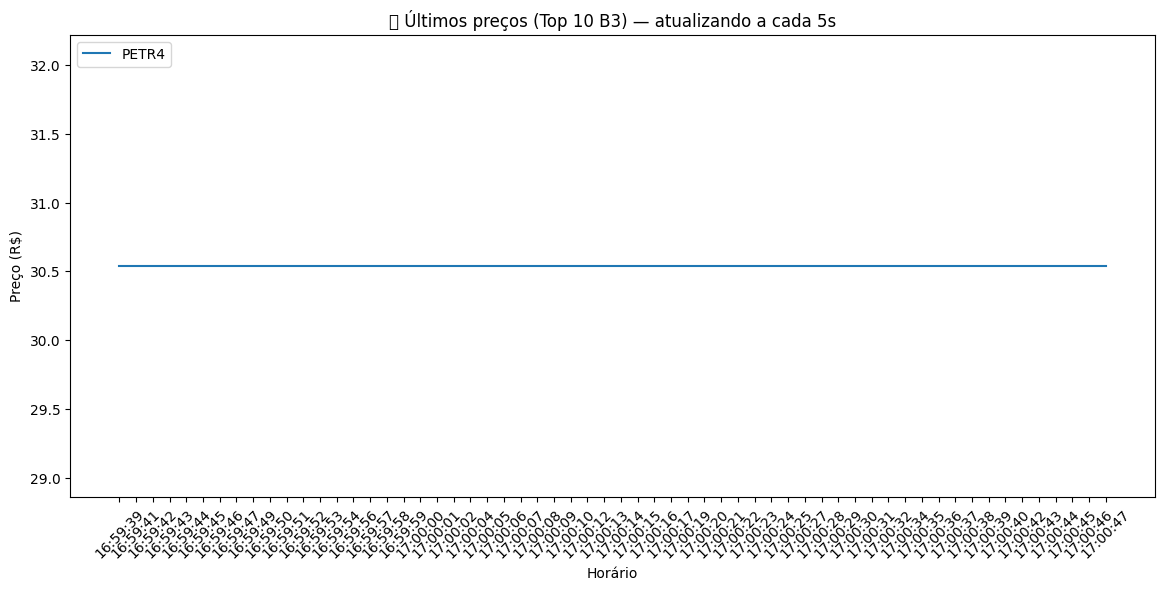

In [12]:
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
from IPython.display import clear_output
from datetime import datetime
from collections import deque
import time
import numpy as np

# ✅ Ativos
#tickers = ["VALE3", "PETR4", "ITUB4", "B3SA3", "BBAS3", "ABEV3", "WEGE3", "RENT3", "GGBR4", "PRIO3"]
tickers = ["PETR4"]
N = 60  # Últimos N pontos

# ✅ Inicializar MT5
if not mt5.initialize():
    print("❌ MT5 erro:", mt5.last_error())
    quit()
print("✅ Conectado ao MT5")

# ✅ Ativar símbolos
for symbol in tickers:
    info = mt5.symbol_info(symbol)
    if info and not info.visible:
        mt5.symbol_select(symbol, True)

# ✅ Armazenamento
data = {sym: deque(maxlen=N) for sym in tickers}
timestamps = deque(maxlen=N)

# ✅ Loop manual para notebooks
try:
    while True:
        current_time = datetime.now().strftime('%H:%M:%S')
        valid = False

        for symbol in tickers:
            tick = mt5.symbol_info_tick(symbol)
            price = (
                tick.last if tick and tick.last and tick.last > 0
                else tick.bid if tick and tick.bid and tick.bid > 0
                else None
            )
            data[symbol].append(price if price is not None else np.nan)
            valid = True

        if valid:
            timestamps.append(current_time)

        # 🧼 Gráfico
        clear_output(wait=True)
        plt.figure(figsize=(14, 6))
        for symbol in tickers:
            series = [p if p is not None else np.nan for p in data[symbol]]
            plt.plot(timestamps, series, label=symbol)

        plt.title("📈 Últimos preços (Top 10 B3) — atualizando a cada 5s")
        plt.xlabel("Horário")
        plt.ylabel("Preço (R$)")
        plt.legend(loc="upper left")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.grid()
        plt.show()

        time.sleep(1)

except KeyboardInterrupt:
    print("⏹️ Loop interrompido.")

finally:
    mt5.shutdown()


In [5]:
import MetaTrader5 as mt5
from datetime import datetime, timedelta

# Inicializar MT5
if not mt5.initialize():
    print("❌ Erro ao conectar ao MetaTrader 5:", mt5.last_error())
    quit()

# ✅ Painel completo da conta XP
print("\n📋 INFORMAÇÕES COMPLETAS DA CONTA XP")
account = mt5.account_info()
if account:
    print(f"👤 Nome:          {account.name}")
    print(f"🆔 Conta:         {account.login}")
    print(f"💰 Saldo:         R$ {account.balance:.2f}")
    print(f"📈 Equidade:      R$ {account.equity:.2f}")
    print(f"📊 Lucro atual:   R$ {account.profit:.2f}")
    print(f"🔒 Margem usada:  R$ {account.margin:.2f}")
    print(f"🪙 Margem livre:  R$ {account.margin_free:.2f}")
else:
    print("❌ Não foi possível acessar as informações da conta.")

# ✅ Posições abertas
positions = mt5.positions_get()
print("\n📦 POSIÇÕES ABERTAS:")
if positions:
    for p in positions:
        tipo = "🟢 Compra" if p.type == mt5.ORDER_TYPE_BUY else "🔴 Venda"
        print(f"{p.symbol} | {tipo} | {p.volume:.2f} ações | PM: R$ {p.price_open:.2f} | Lucro: R$ {p.profit:.2f}")
else:
    print("📭 Nenhuma posição aberta.")

# ✅ Ordens pendentes
orders = mt5.orders_get()
print("\n⏳ ORDENS PENDENTES:")
if orders:
    for o in orders:
        tipo = "🔼 Compra" if o.type == mt5.ORDER_TYPE_BUY_LIMIT else "🔽 Venda"
        print(f"{o.symbol} | {tipo} | R$ {o.price:.2f} | Vol: {o.volume_current:.2f}")
else:
    print("📭 Nenhuma ordem pendente.")

# ✅ Histórico de negociações (últimos 7 dias)
print("\n📜 HISTÓRICO DE NEGOCIAÇÕES (últimos 7 dias):")
start = datetime.now() - timedelta(days=7)
end = datetime.now()
deals = mt5.history_deals_get(start, end)
if deals:
    for d in deals:
        tipo = "Buy" if d.type == mt5.ORDER_TYPE_BUY else "Sell"
        print(f"{d.symbol} | {tipo} | R$ {d.price:.2f} | Vol: {d.volume:.2f} | Lucro: R$ {d.profit:.2f}")
else:
    print("📭 Nenhum negócio recente nos últimos 7 dias.")

# Encerrar conexão
mt5.shutdown()




📋 INFORMAÇÕES COMPLETAS DA CONTA XP
👤 Nome:          JAQUELINE BRENNY SANTANA
🆔 Conta:         2018496611
💰 Saldo:         R$ 0.00
📈 Equidade:      R$ 0.00
📊 Lucro atual:   R$ 0.00
🔒 Margem usada:  R$ 0.00
🪙 Margem livre:  R$ 0.00

📦 POSIÇÕES ABERTAS:
📭 Nenhuma posição aberta.

⏳ ORDENS PENDENTES:
📭 Nenhuma ordem pendente.

📜 HISTÓRICO DE NEGOCIAÇÕES (últimos 7 dias):
 | Sell | R$ 0.00 | Vol: 0.00 | Lucro: R$ 0.00


True

In [ ]:
import MetaTrader5 as mt5
from datetime import datetime

# Inicializa o MT5
if not mt5.initialize():
    print("Erro ao inicializar o MetaTrader 5:", mt5.last_error())
    quit()

print("\n\U0001F4CB PAINEL DE DIAGNÓSTICO COMPLETO\n")

# Verifica a conta atual
account = mt5.account_info()
if account:
    print(f"✅ Conta MT5 ativa: {account.login}")
else:
    print("❌ Erro ao obter informações da conta")
    mt5.shutdown()
    quit()

# Verifica POSIÇÕES ABERTAS
print("\n\U0001F4E6 POSIÇÕES ABERTAS NO MT5:")
positions = mt5.positions_get()
if positions:
    for p in positions:
        tipo = "Compra" if p.type == mt5.ORDER_TYPE_BUY else "Venda"
        print(f"{p.symbol} | {tipo} | {p.volume} ações | PM: R$ {p.price_open:.2f} | Lucro: R$ {p.profit:.2f}")
else:
    print("📭 Nenhuma posição aberta.")

# Verifica HISTÓRICO COMPLETO DE NEGOCIAÇÕES
print("\n\U0001F4DC HISTÓRICO COMPLETO DE NEGÓCIOS:")
start = datetime(2020, 1, 1)
end = datetime.now()
deals = mt5.history_deals_get(start, end)
if deals:
    for d in deals:
        tipo = "Buy" if d.type == mt5.ORDER_TYPE_BUY else "Sell"
        symbol = d.symbol if d.symbol else "(sem símbolo)"
        print(f"{symbol} | {tipo} | {d.volume} | R$ {d.price:.2f} | Lucro: R$ {d.profit:.2f}")
else:
    print("📭 Nenhum negócio encontrado.")

mt5.shutdown()



📋 PAINEL DE DIAGNÓSTICO COMPLETO

✅ Conta MT5 ativa: 2018496611

📦 POSIÇÕES ABERTAS NO MT5:
📭 Nenhuma posição aberta.

📜 HISTÓRICO COMPLETO DE NEGÓCIOS:
(sem símbolo) | Sell | 0.0 | R$ 0.00 | Lucro: R$ 0.00


True

In [12]:
import MetaTrader5 as mt5
import pandas as pd
import plotly.express as px
import plotly.io as pio
import time
from IPython.display import clear_output, display

# Configura o Plotly para funcionar no notebook
pio.renderers.default = 'notebook'

def coletar_dados_b3():
    if not mt5.initialize():
        print("Erro ao conectar no MT5:", mt5.last_error())
        return pd.DataFrame()

    symbols = mt5.symbols_get()

    # Seleciona apenas ações da B3
    acoes_b3 = [
        s.name for s in symbols
        if s.path and "BOVESPA" in s.path
        and (s.name.endswith('3') or s.name.endswith('4') or s.name.endswith('11'))
    ]

    dados = []
    for ticker in acoes_b3:
        info = mt5.symbol_info(ticker)
        tick = mt5.symbol_info_tick(ticker)
        if info is None or tick is None:
            continue
        if not info.visible:
            mt5.symbol_select(ticker, True)

        preco_atual = tick.last
        preco_referencia = getattr(info, 'last', None)

        if preco_atual == 0 or preco_referencia in [None, 0]:
            continue

        variacao = ((preco_atual - preco_referencia) / preco_referencia) * 100
        valor_negociado = preco_atual * info.volume

        dados.append({
            'Ticker': ticker,
            'Variação (%)': round(variacao, 2),
            'Preço Atual': round(preco_atual, 2),
            'Volume (Qtd)': int(info.volume),
            'Valor Negociado (R$)': round(valor_negociado, 2)
        })

    mt5.shutdown()
    df = pd.DataFrame(dados)
    return df.sort_values(by="Valor Negociado (R$)", ascending=False).head(500)

# Atualização contínua no notebook
try:
    while True:
        df = coletar_dados_b3()
        clear_output(wait=True)

        print("🧾 Base de dados atualizada (Top 100 por valor negociado):")
        if df.empty:
            print("⚠️ Nenhum dado encontrado. Verifique o MT5.")
        else:
            display(df.style.format({
                'Variação (%)': '{:+.2f}%',
                'Preço Atual': 'R$ {:.2f}',
                'Valor Negociado (R$)': 'R$ {:,.2f}'
            }))

            # Gera o treemap
            fig = px.treemap(
                df,
                path=['Ticker'],
                values='Valor Negociado (R$)',
                color='Variação (%)',
                color_continuous_scale='RdYlGn',
                title='Treemap em tempo real – Ações da B3 (Top 100 por valor negociado)',
            )
            fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
            fig.show()

        time.sleep(5)

except KeyboardInterrupt:
    print("⏹️ Atualização interrompida pelo usuário.")





🧾 Base de dados atualizada (Top 100 por valor negociado):


,Ticker,Variação (%),Preço Atual,Volume (Qtd),Valor Negociado (R$)
67,SBSP3,+0.00%,R$ 119.80,673100,"R$ 80,637,380.00"
15,B3SA3,+0.00%,R$ 12.70,5714000,"R$ 72,567,800.00"
39,EQTL3,+0.00%,R$ 35.68,1921300,"R$ 68,551,984.00"
58,PETR3,+0.00%,R$ 32.94,1493100,"R$ 49,182,714.00"
42,GGBR4,+0.00%,R$ 16.47,2065500,"R$ 34,018,785.00"
13,ASAI3,+0.00%,R$ 9.93,2730400,"R$ 27,112,872.00"
73,TOTS3,+0.00%,R$ 42.34,483800,"R$ 20,484,092.00"
72,TIMS3,+0.00%,R$ 22.08,834200,"R$ 18,419,136.00"
74,UGPA3,+0.00%,R$ 16.96,909700,"R$ 15,428,512.00"
38,ENGI11,+0.00%,R$ 46.79,304000,"R$ 14,224,160.00"


⏹️ Atualização interrompida pelo usuário.


In [11]:
import MetaTrader5 as mt5
import pandas as pd
from datetime import datetime

# Inicializa o MT5
if not mt5.initialize():
    raise RuntimeError(f"Erro ao inicializar MT5: {mt5.last_error()}")

# Define o ativo da B3
symbol = "PETR4"

# Seleciona o ativo
if not mt5.symbol_select(symbol, True):
    raise ValueError(f"Ativo {symbol} não está disponível")

# Obtém symbol_info e symbol_info_tick
info = mt5.symbol_info(symbol)
tick = mt5.symbol_info_tick(symbol)

# Converte symbol_info
info_dict = info._asdict() if info else {}
# Converte timestamps no info
for key in ['expiration_time', 'time']:
    valor = info_dict.get(key)
    if isinstance(valor, (int, float)) and valor > 0:
        try:
            info_dict[key] = datetime.fromtimestamp(valor)
        except (OSError, OverflowError, ValueError):
            info_dict[key] = None  # marca como inválido

# Converte symbol_info_tick
tick_dict = tick._asdict() if tick else {}
# Converte timestamps no tick
for key in ['time', 'time_msc']:
    if key in tick_dict and tick_dict[key] and tick_dict[key] > 0:
        tick_dict[key] = datetime.fromtimestamp(tick_dict[key] / (1000 if 'msc' in key else 1))

# Converte em DataFrames
df_info = pd.DataFrame(info_dict.items(), columns=["Campo", "Valor"])
df_tick = pd.DataFrame(tick_dict.items(), columns=["Campo", "Valor"])

# Mostra os dados no Jupyter
print("📘 Informações completas do ativo PETR4:")
display(df_info)

print("\n📗 Tick em tempo real:")
display(df_tick)

# Encerra o terminal MT5
mt5.shutdown()


📘 Informações completas do ativo PETR4:


,Campo,Valor
0,custom,False
1,chart_mode,1
2,select,True
3,visible,True
4,session_deals,233
...,...,...
91,formula,
92,isin,BRPETRACNPR6
93,name,PETR4
94,page,



📗 Tick em tempo real:


,Campo,Valor
0,time,2025-08-14 07:04:18
1,bid,30.58
2,ask,30.59
3,last,30.59
4,volume,1700
5,time_msc,2025-08-14 07:04:18.910000
6,flags,0
7,volume_real,1700.0


True